# Imports

notes:

scipy==1.12
gensim==4.3.1
numpy==1.22


In [1]:
%pip install -r requirements.txt

# Todo: NEED TO ADD SPELL CHECK

Note: you may need to restart the kernel to use updated packages.


In [1]:
#import kagglehub
import os
import shutil
import pandas as pd

import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer

from gensim.models import Word2Vec

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
import re,string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.manifold import MDS


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

import pandas as pd
import os


from gensim.models import Word2Vec,LdaMulticore, TfidfModel
from gensim import corpora


from gensim.models.doc2vec import Doc2Vec, TaggedDocument


import pkg_resources
from symspellpy.symspellpy import SymSpell, Verbosity

import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import ssl
import certifi
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text  # This is necessary for ELMo
import numpy as np

import ssl
import certifi
import tensorflow_hub as hub

from collections import Counter


In [ ]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# 1. EDA and Data Wrangling 


## Load


In [ ]:
# download the data
# Download latest version
path = kagglehub.dataset_download("subhajeetdas/hate-comment")

print("Path to dataset files:", path)

destination_path = "/Users/gracefujinaga/Documents/Northwestern/MSDS_453/MSDS_453/data"
os.makedirs(destination_path, exist_ok=True)

# move downloaded files
for file in os.listdir(path):
    shutil.move(os.path.join(path, file), destination_path)

print("Dataset moved to:", destination_path)

In [11]:
data = pd.read_csv('/Users/gracefujinaga/Documents/Northwestern/MSDS_453/MSDS_453/data/hate.csv')

In [12]:
data.drop(columns=['0'], inplace=True)


In [13]:
data

,comment,label
0,dalits are lowlives,N
1,gay people are a burden to our society,N
2,Arabs are not welcome,N
3,I'm not saying we should actually eliminate he...,N
4,bananas are for black people,N
...,...,...
41139,Indian culture is so backwards,N
41140,"Women don't want equality, they just want to b...",N
41141,fuck covid,P
41142,This computer is garbage,P


/var/folders/zv/4f9cw9vs6tjbvz5bh2k07w_40000gn/T/ipykernel_47119/633069675.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Hateful", "Non Hateful", "Other"])


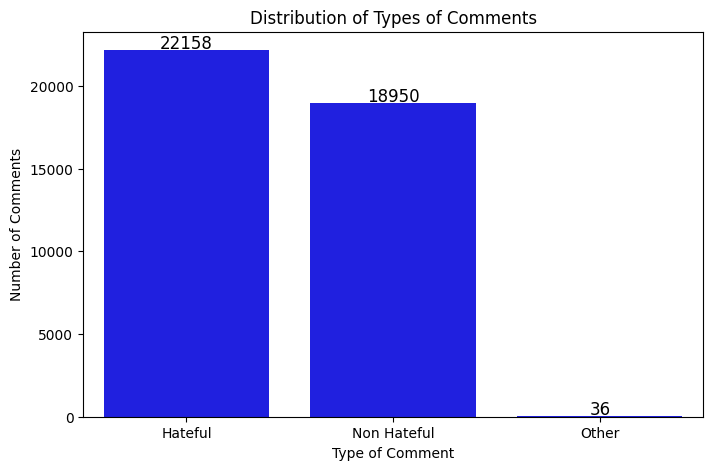

In [14]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data['label'].value_counts(), color="Blue")

# Labels and title
plt.xlabel("Type of Comment")
plt.ylabel("Number of Comments")
plt.title("Distribution of Types of Comments")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='Black', 
                xytext=(0, 5), textcoords='offset points')

# Customize x-axis labels
ax.set_xticklabels(["Hateful", "Non Hateful", "Other"])


# Show plot
plt.show()

## Data distribution

In [15]:
filtered_df = data[data['label'] == 'N']
filtered_df

,comment,label
0,dalits are lowlives,N
1,gay people are a burden to our society,N
2,Arabs are not welcome,N
3,I'm not saying we should actually eliminate he...,N
4,bananas are for black people,N
...,...,...
41136,Mandatory masks should be for mozzies only,N
41137,Women are dishonest,N
41139,Indian culture is so backwards,N
41140,"Women don't want equality, they just want to b...",N


N: gay people are a burden to our society

P(non hate): 
- this drink sucks, it's awful
- fuck covid

N(hate):
- gay people are a burden to our society
- Arabs are not welcome



## Cleaning

In [16]:
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

def clean_comment(comment): 

    suggestions = sym_spell.lookup_compound(comment, max_edit_distance=2)

    for suggestion in suggestions:
        #print(suggestion.term)
        tokens = suggestion.term

    #split document into individual words
    tokens=tokens.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))

    # # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]

    # # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]

    # # filter out short tokens
    # tokens = [word for word in tokens if len(word) > 4]

    #lowercase all words
    tokens = [word.lower() for word in tokens]

    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]    

    # word stemming    
    ps=PorterStemmer()
    tokens=[ps.stem(word) for word in tokens]

    #print(tokens)
    return tokens


In [17]:
# Apply the clean_comment function to the 'comment' column
data['cleaned_comment'] = data['comment'].apply(clean_comment)

# Compute comment lengths after cleaning
data['comment_length'] = data['cleaned_comment'].apply(len)

# Get statistics
average_length = data['comment_length'].mean()
max_length = data['comment_length'].max()
min_length = data['comment_length'].min()

# Display results
print(f"Average Length: {average_length}")
print(f"Max Length: {max_length}")
print(f"Min Length: {min_length}")


Average Length: 12.594764728757534
Max Length: 212
Min Length: 0


In [18]:

# Compute comment lengths

data['comment_length'] = data['comment'].apply(len)

# Get statistics
average_length = data['comment_length'].mean()
max_length = data['comment_length'].max()
min_length = data['comment_length'].min()

# Display results
print(f"Average Length: {average_length}")
print(f"Max Length: {max_length}")
print(f"Min Length: {min_length}")


data['comment_length_clean'] = data['cleaned_comment'].apply(len)

# Get statistics
average_length = data['comment_length_clean'].mean()
max_length = data['comment_length_clean'].max()
min_length = data['comment_length_clean'].min()

# Display results
print(f"Average Length: {average_length}")
print(f"Max Length: {max_length}")
print(f"Min Length: {min_length}")



Average Length: 134.29642232160217
Max Length: 2374
Min Length: 4
Average Length: 12.594764728757534
Max Length: 212
Min Length: 0


In [19]:
# want to stitch back together the cleaned_comment
data['cleaned_comment_string'] = data['cleaned_comment'].apply(lambda x: " ".join(x))

In [20]:
data

,comment,label,cleaned_comment,comment_length,comment_length_clean,cleaned_comment_string
0,dalits are lowlives,N,"[davit, lowlif]",19,2,davit lowlif
1,gay people are a burden to our society,N,"[gay, peopl, burden, societi]",38,4,gay peopl burden societi
2,Arabs are not welcome,N,"[arab, welcom]",21,2,arab welcom
3,I'm not saying we should actually eliminate he...,N,"[im, say, actual, elimin, herb, wish, natur, b...",93,9,im say actual elimin herb wish natur becam ext...
4,bananas are for black people,N,"[banana, black, peopl]",28,3,banana black peopl
...,...,...,...,...,...,...
41139,Indian culture is so backwards,N,"[indian, cultur, backward]",30,3,indian cultur backward
41140,"Women don't want equality, they just want to b...",N,"[women, dont, want, equal, want, charg]",57,6,women dont want equal want charg
41141,fuck covid,P,"[fuck, covid]",10,2,fuck covid
41142,This computer is garbage,P,"[comput, garbag]",24,2,comput garbag


In [22]:
data.to_csv('./data/hate_cleaned.csv', index=False)

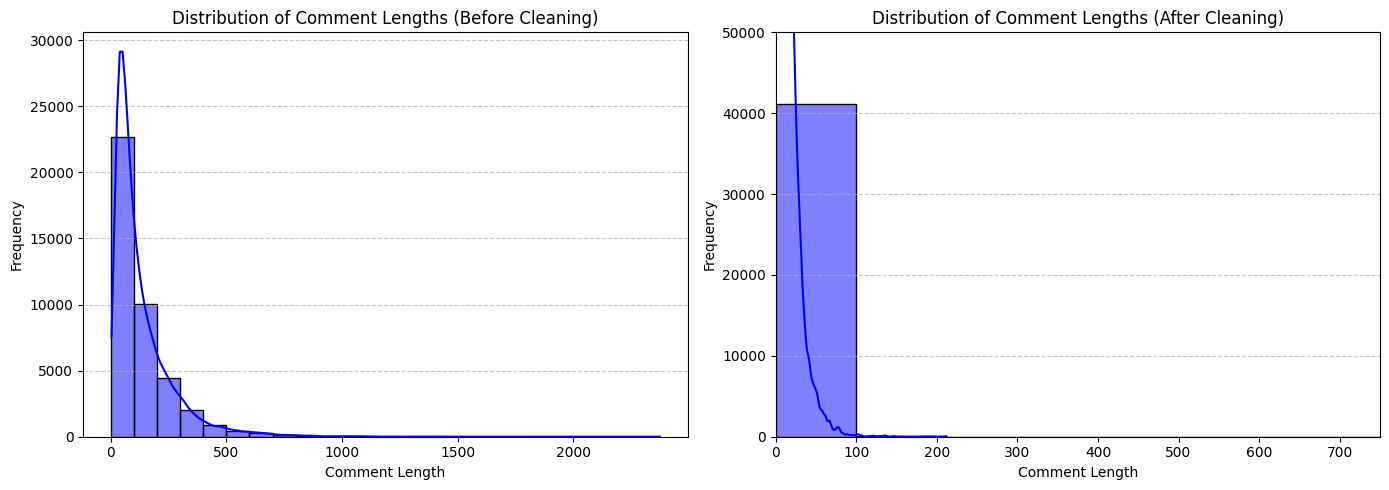

In [23]:

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

bins = range(0, 2001, 100)  # Bins from 0 to 2000 with a step of 100

# Plot first histogram
sns.histplot(data['comment_length'], bins=bins, kde=True, color='blue', ax=axes[0])
axes[0].set_xlabel("Comment Length")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Comment Lengths (Before Cleaning)")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot second histogram
sns.histplot(data['comment_length_clean'], bins=bins, kde=True, color='blue', ax=axes[1])
axes[1].set_xlabel("Comment Length")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Comment Lengths (After Cleaning)")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.xlim(0, 750)
plt.ylim(0,50000)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## Words

In [24]:
data

,comment,label,cleaned_comment,comment_length,comment_length_clean,cleaned_comment_string
0,dalits are lowlives,N,"[davit, lowlif]",19,2,davit lowlif
1,gay people are a burden to our society,N,"[gay, peopl, burden, societi]",38,4,gay peopl burden societi
2,Arabs are not welcome,N,"[arab, welcom]",21,2,arab welcom
3,I'm not saying we should actually eliminate he...,N,"[im, say, actual, elimin, herb, wish, natur, b...",93,9,im say actual elimin herb wish natur becam ext...
4,bananas are for black people,N,"[banana, black, peopl]",28,3,banana black peopl
...,...,...,...,...,...,...
41139,Indian culture is so backwards,N,"[indian, cultur, backward]",30,3,indian cultur backward
41140,"Women don't want equality, they just want to b...",N,"[women, dont, want, equal, want, charg]",57,6,women dont want equal want charg
41141,fuck covid,P,"[fuck, covid]",10,2,fuck covid
41142,This computer is garbage,P,"[comput, garbag]",24,2,comput garbag


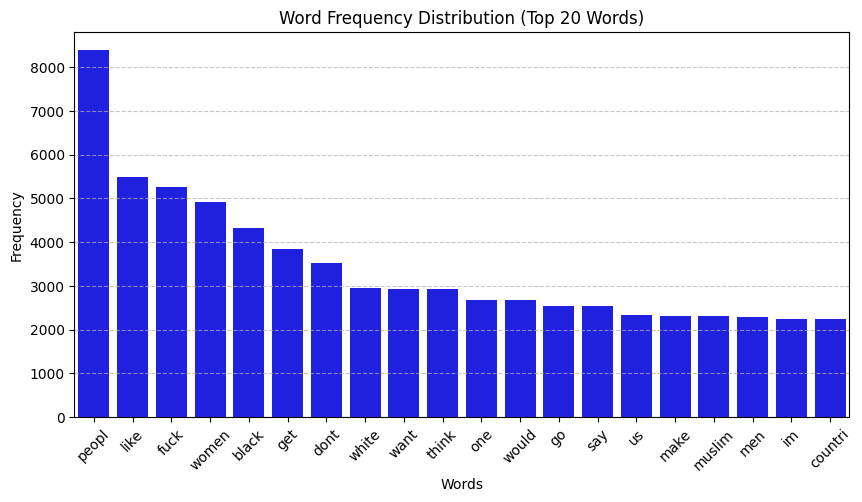

In [ ]:
# figure out the word count
filtered_words = [word for sublist in data['cleaned_comment'] for word in sublist]

# Count word frequencies
word_counts = Counter(filtered_words)

# Convert to DataFrame for plotting
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# Sort by frequency
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)
word_freq_df = word_freq_df.iloc[:20]

# Plot histogram
plt.figure(figsize=(10, 5))
sns.barplot(x=word_freq_df['word'], y=word_freq_df['count'], color='blue')

# Labels and title
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Top 20 Words)")
plt.xticks(rotation=45)  # Rotate words for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


# Clustering and Word Embeddings

## Clustering

In [ ]:

def cluster_embeddings(embeddings, n_clusters=2, eps=0.5, min_samples=5, use_reduc=True, use_tsne=False):
    """
    Clusters word embeddings using KMeans and DBSCAN.

    Args:
        embeddings (np.array): Word embeddings (n_samples, n_features).
        n_clusters (int): Number of clusters for KMeans.
        eps (float): Maximum distance between two samples for DBSCAN.
        min_samples (int): Minimum samples for DBSCAN.
        use_reduc (bool): If False, dont use any dimension reduction
        use_tsne (bool): If True, use TSNE for visualization; otherwise, use PCA.

    Returns:
        dict: Cluster labels for KMeans and DBSCAN.
    """

    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(embeddings)

    # DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(embeddings)

    # Reduce dimensions for visualization
    if use_reduc:
        if use_tsne:
            reducer = TSNE(n_components=2, random_state=42)
        else:
            reducer = PCA(n_components=2, random_state=42)

        reduced_embeddings = reducer.fit_transform(embeddings)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=kmeans_labels, palette="viridis", ax=axes[0])
    axes[0].set_title("KMeans Clustering")

    sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=dbscan_labels, palette="coolwarm", ax=axes[1])
    axes[1].set_title("DBSCAN Clustering")

    plt.show()

    return {
        'kmeans_labels': kmeans_labels,
        'dbscan_labels': dbscan_labels
    }

# Example usage
embeddings = np.random.rand(100, 300)  # Example embeddings (100 words, 300 dimensions)
result = cluster_embeddings(embeddings)
# print(result)



# 2. word emebeddings:
 - Word2Vec
 - GloVe
 - Elmo
 - Bert
 - TF-IDF
 

 Probably:
- make the max length 200 based on the histogram
- use word2vec
- TF-IDF
- work on seeing how elmo/other things work
- spell check?


## TF-IDF


In [36]:
Tfidf=TfidfVectorizer(ngram_range=(1,1))

TFIDF_matrix=Tfidf.fit_transform(data['cleaned_comment_string'].tolist())     

#creating datafram from TFIDF Matrix
tfidf_matrix_df=pd.DataFrame(TFIDF_matrix.toarray(), columns=Tfidf.get_feature_names_out(), index=data['label'].tolist())

average_TFIDF={}
for i in tfidf_matrix_df.columns:
    average_TFIDF[i]=np.mean(tfidf_matrix_df[i])

average_TFIDF_DF=pd.DataFrame(average_TFIDF,index=[0]).transpose()

average_TFIDF_DF.columns=['TFIDF']

#calculate Q1 and Q3 range
Q1=np.percentile(average_TFIDF_DF, 25)
Q3=np.percentile(average_TFIDF_DF, 75)
IQR = Q3 - Q1
outlier=Q3+(1.5*IQR)

#words that exceed the Q3+IQR*1.5
outlier_list=average_TFIDF_DF[average_TFIDF_DF['TFIDF']>=outlier]


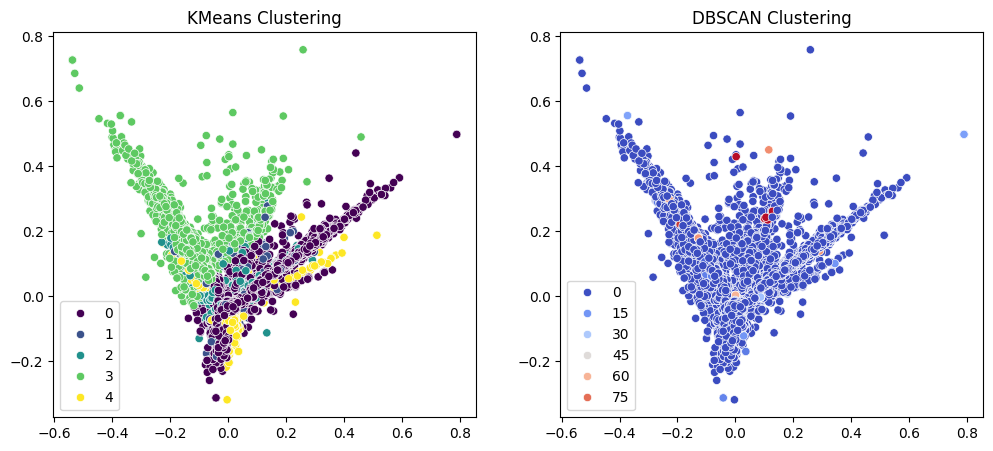

{'kmeans_labels': array([0, 3, 0, ..., 0, 0, 4], dtype=int32),
 'dbscan_labels': array([-1, -1, -1, ..., -1, -1, -1])}

In [39]:
cluster_embeddings(TFIDF_matrix)

Random Forest Accuracy: 0.6138, AUC: 0.6787
Gradient Boosting Accuracy: 0.6606, AUC: 0.7011
Logistic Regression Accuracy: 0.6759, AUC: 0.7467
kNN Accuracy: 0.5219, AUC: 0.5110
Decision Tree Accuracy: 0.5643, AUC: 0.5769


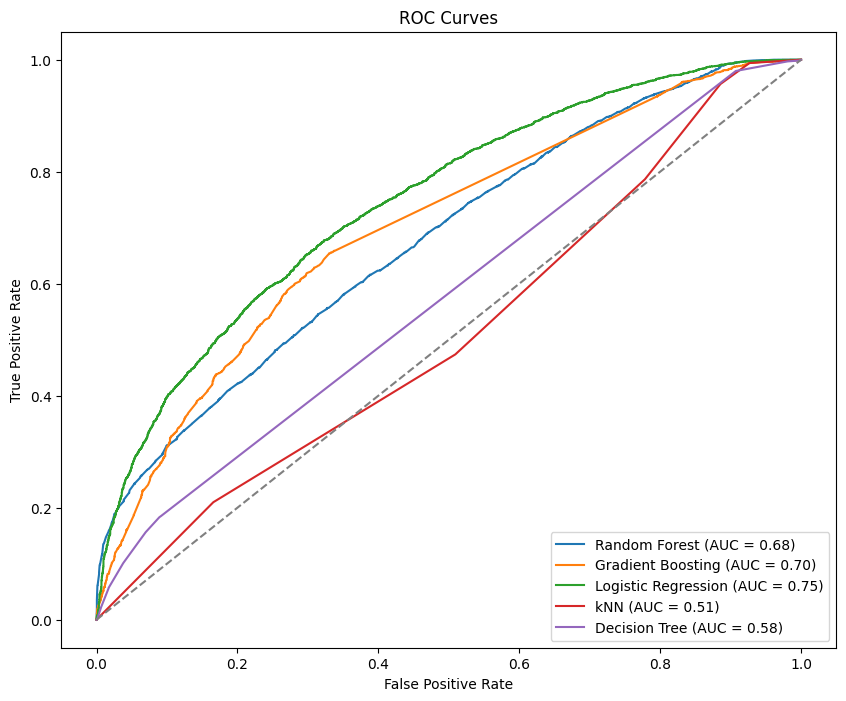

(0.6138048365536517,
 0.6786858922084662,
 0.6605905942398833,
 0.7010981688783453,
 0.6759022967553773,
 0.7466980502631774,
 0.5219346214606878,
 0.5109738601823709,
 0.5643456069996354,
 0.5769091556082735)

In [79]:
classification_model(TFIDF_matrix, data['label'])

## Doc2Vec

In [58]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(data['cleaned_comment'])]
model = Doc2Vec(documents, vector_size=50, window=2, min_count=1, workers=4)


# Train the model
model = Doc2Vec(vector_size=50, window=2, min_count=1, workers=4, epochs=20)
model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

doc2vec_embeddings = np.array([model.dv[i] for i in range(len(documents))])
            


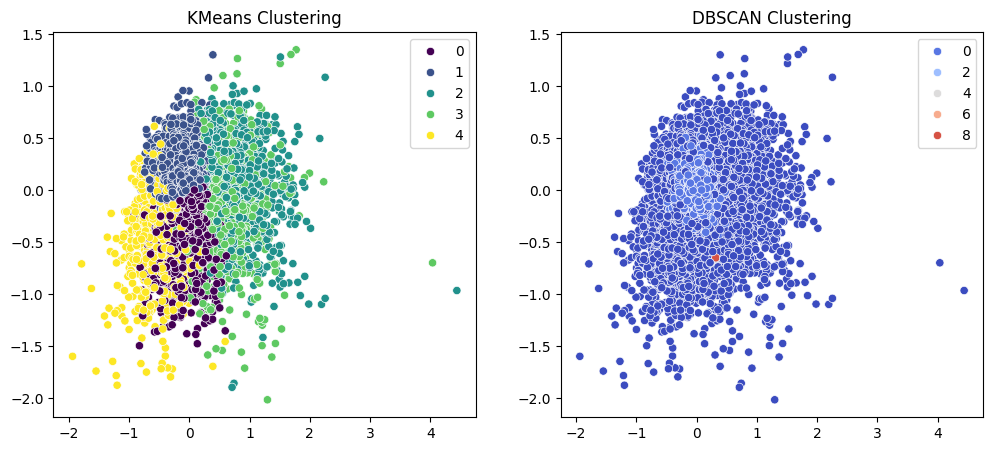

{'kmeans_labels': array([1, 0, 1, ..., 0, 1, 1], dtype=int32),
 'dbscan_labels': array([0, 0, 0, ..., 0, 0, 0])}

In [47]:
cluster_embeddings(doc2vec_embeddings)

Random Forest Accuracy: 0.5710, AUC: 0.6175
Gradient Boosting Accuracy: 0.6113, AUC: 0.6570
Logistic Regression Accuracy: 0.5910, AUC: 0.6376
kNN Accuracy: 0.5368, AUC: 0.5709
Decision Tree Accuracy: 0.5669, AUC: 0.5960


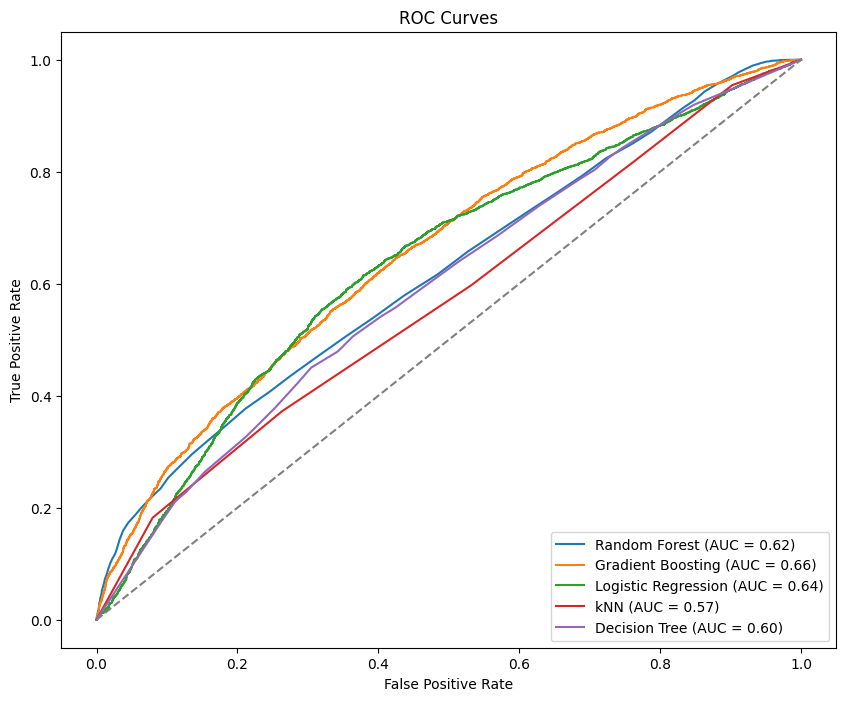

(0.5710292866690971,
 0.617536214693454,
 0.6112528861344028,
 0.6569904366520869,
 0.5909588042289464,
 0.6375914004003262,
 0.5367602381820391,
 0.5709238638890948,
 0.5668975574188845,
 0.5960345763214471)

In [78]:
classification_model(doc2vec_embeddings, data['label'])

## Word2Vec

In [48]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

# Tokenize comments (assuming data['cleaned_comment'] contains lists of words)
tokenized_comments = data['cleaned_comment']

# Train Word2Vec model (or load pre-trained vectors)
w2v_model = Word2Vec(sentences=tokenized_comments, vector_size=100, window=5, min_count=1, workers=4)

# Function to compute sentence vector by averaging word vectors
def get_sentence_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Convert all comments into vectors
sentence_vectors = np.array([get_sentence_vector(comment, w2v_model) for comment in tokenized_comments])

# Apply K-Means clustering
k = 8  # Number of clusters
km = KMeans(n_clusters=k, random_state=89)
clusters = km.fit_predict(sentence_vectors)

# Create DataFrame
data['Cluster'] = clusters
cluster_df = data[['Cluster', 'label', 'cleaned_comment']]

print(cluster_df)

       Cluster label                                    cleaned_comment
0            5     N                                    [davit, lowlif]
1            4     N                      [gay, peopl, burden, societi]
2            0     N                                     [arab, welcom]
3            3     N  [im, say, actual, elimin, herb, wish, natur, b...
4            4     N                             [banana, black, peopl]
...        ...   ...                                                ...
41139        7     N                         [indian, cultur, backward]
41140        6     N            [women, dont, want, equal, want, charg]
41141        2     P                                      [fuck, covid]
41142        5     P                                   [comput, garbag]
41143        3     N                          [good, muslim, dead, one]

[41144 rows x 3 columns]


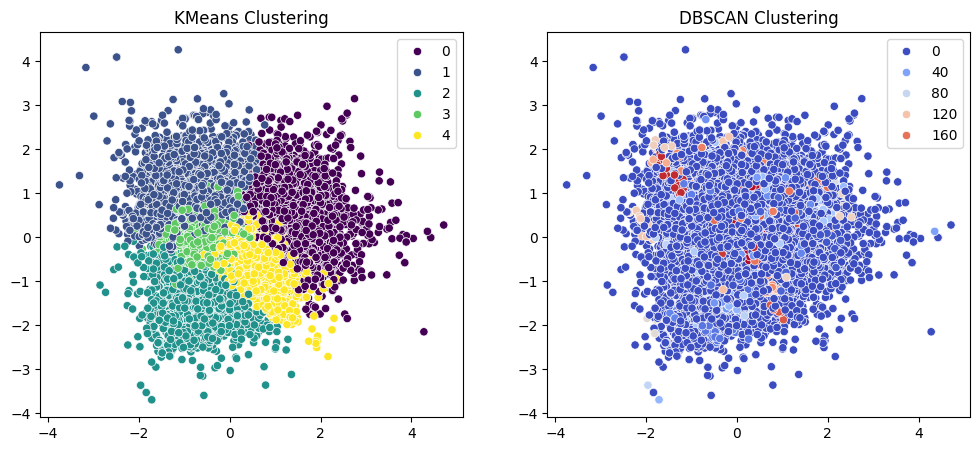

{'kmeans_labels': array([3, 0, 1, ..., 2, 3, 4], dtype=int32),
 'dbscan_labels': array([ 0, -1, -1, ..., -1,  0, -1])}

In [49]:
cluster_embeddings(sentence_vectors)

Random Forest Accuracy: 0.5612, AUC: 0.6113
Gradient Boosting Accuracy: 0.6126, AUC: 0.6633
Logistic Regression Accuracy: 0.6143, AUC: 0.6659
kNN Accuracy: 0.5489, AUC: 0.5873
Decision Tree Accuracy: 0.5821, AUC: 0.6144


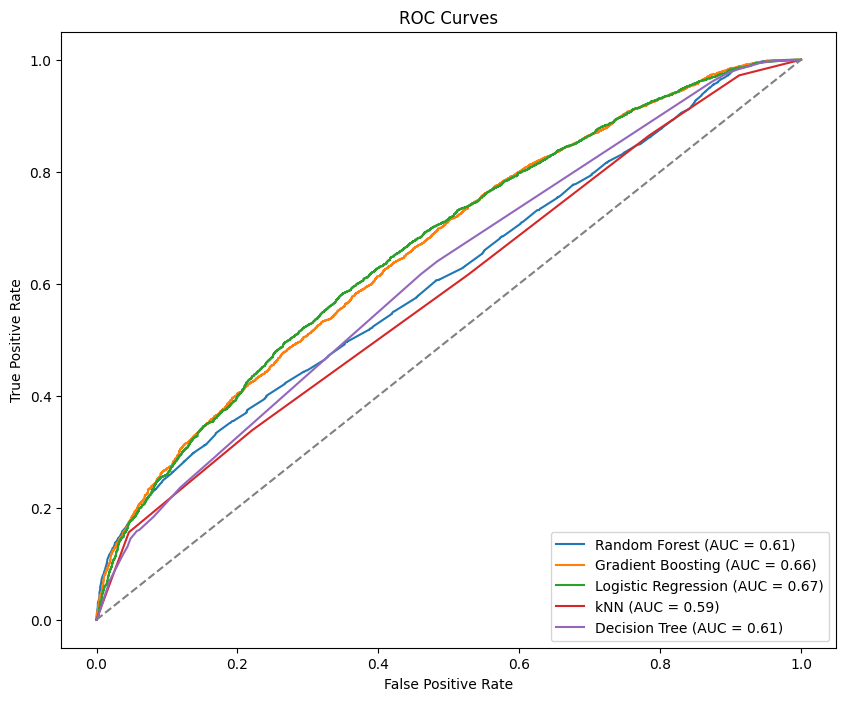

(0.5611860493377081,
 0.6112821410037809,
 0.612589622068295,
 0.6632616798873157,
 0.6142909223477944,
 0.6658851508636666,
 0.5489123830356057,
 0.5873404403588108,
 0.5820877384858427,
 0.6144150048187412)

In [77]:
classification_model(sentence_vectors, data['label'])

## BERT


In [51]:

# Load pre-trained BERT model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast & efficient

# Convert comments to BERT embeddings
bert_embeddings = bert_model.encode(data['cleaned_comment_string'].tolist(), show_progress_bar=True)

# Normalize embeddings
bert_embeddings = StandardScaler().fit_transform(bert_embeddings)


Batches: 100%|██████████| 1286/1286 [01:01<00:00, 20.84it/s]


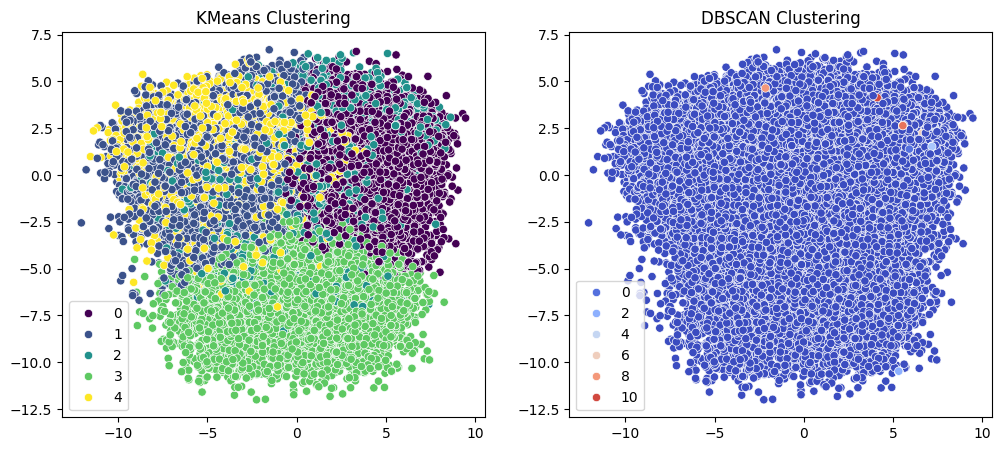

{'kmeans_labels': array([0, 1, 4, ..., 0, 0, 4], dtype=int32),
 'dbscan_labels': array([-1, -1, -1, ..., -1, -1, -1])}

In [52]:
cluster_embeddings(bert_embeddings)

Random Forest Accuracy: 0.5968, AUC: 0.6318
Gradient Boosting Accuracy: 0.6445, AUC: 0.6976
Logistic Regression Accuracy: 0.6571, AUC: 0.7104
kNN Accuracy: 0.5795, AUC: 0.6313
Decision Tree Accuracy: 0.5763, AUC: 0.6081


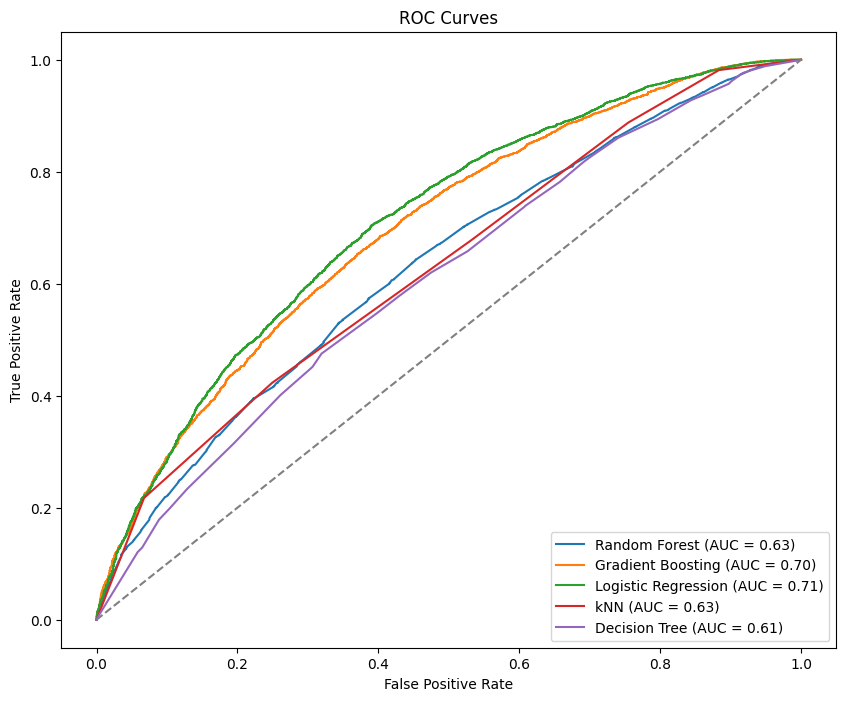

(0.5967918337586584,
 0.6317630365482987,
 0.6445497630331753,
 0.697568092519831,
 0.657066472232349,
 0.7103515753576988,
 0.5795357880665938,
 0.6312637259989621,
 0.5762547089561307,
 0.6081332048335681)

In [76]:
classification_model(bert_embeddings, data['label'])

## Elmo

In [80]:
data

,comment,label,cleaned_comment,comment_length,comment_length_clean,cleaned_comment_string,Cluster
0,dalits are lowlives,N,"[davit, lowlif]",19,2,davit lowlif,5
1,gay people are a burden to our society,N,"[gay, peopl, burden, societi]",38,4,gay peopl burden societi,4
2,Arabs are not welcome,N,"[arab, welcom]",21,2,arab welcom,0
3,I'm not saying we should actually eliminate he...,N,"[im, say, actual, elimin, herb, wish, natur, b...",93,9,im say actual elimin herb wish natur becam ext...,3
4,bananas are for black people,N,"[banana, black, peopl]",28,3,banana black peopl,4
...,...,...,...,...,...,...,...
41139,Indian culture is so backwards,N,"[indian, cultur, backward]",30,3,indian cultur backward,7
41140,"Women don't want equality, they just want to b...",N,"[women, dont, want, equal, want, charg]",57,6,women dont want equal want charg,6
41141,fuck covid,P,"[fuck, covid]",10,2,fuck covid,2
41142,This computer is garbage,P,"[comput, garbag]",24,2,comput garbag,5


In [82]:
len(data)

41144

In [ ]:
# make sure the tensorflow hub isnt reading temporary local directory
os.environ["TFHUB_MODEL_LOAD_FORMAT"] = "UNCOMPRESSED"

# Create SSL context
context = ssl.create_default_context(cafile=certifi.where())

# Load the ELMo model from TensorFlow Hub
elmo = hub.load("https://tfhub.dev/google/elmo/3")

# Function to compute ELMo embeddings for a list of sentences
def elmo_embedding(sentences):
    # Use the model's signature to generate embeddings
    embeddings = elmo.signatures['default'](tf.constant(sentences))
    return embeddings['elmo']

sentences = data['cleaned_comment_string'][:1000]

# # Get the ELMo embeddings for your data
elmo_embeddings = elmo_embedding(sentences)

# all_embeddings = []
# i = 0
# while i < len(data):
#     sentences = data['cleaned_comment_string'][i:1500]
#     elmo_embeddings = elmo_embedding(sentences)
#     all_embeddings.append(elmo_embeddings)
#     i += 1500

# Convert the embeddings into a numpy array for further processing
elmo_embeddings_array = np.array(elmo_embeddings)

# Print the shape of the embeddings (it should be [num_sentences, embedding_size])
print(f"ELMo Embeddings Shape: {elmo_embeddings_array.shape}")

# Example of printing the first embedding
print(f"First Sentence Embedding: {elmo_embeddings_array[0]}")

elmo_embeddings = np.mean(elmo_embeddings, axis=1)

: 

In [89]:
i = 0
while i < len(data):
    sentences = data['cleaned_comment_string'][i:i+1500]
    print(sentences)
    i += 1500

0                                         davit lowlif
1                             gay peopl burden societi
2                                          arab welcom
3    im say actual elimin herb wish natur becam ext...
4                                   banana black peopl
Name: cleaned_comment_string, dtype: object
5                asian peopl shit
6     women reproduc kid men case
7               wear black summer
8         care chines peopl think
9    tri punch letter box see one
Name: cleaned_comment_string, dtype: object
10    feel sorri poor littl half cast boy street he ...
11                                        drink suck aw
12                                      gay purposeless
13                  thought world free black make happi
14          rape cultur immigr women dont even see rape
Name: cleaned_comment_string, dtype: object


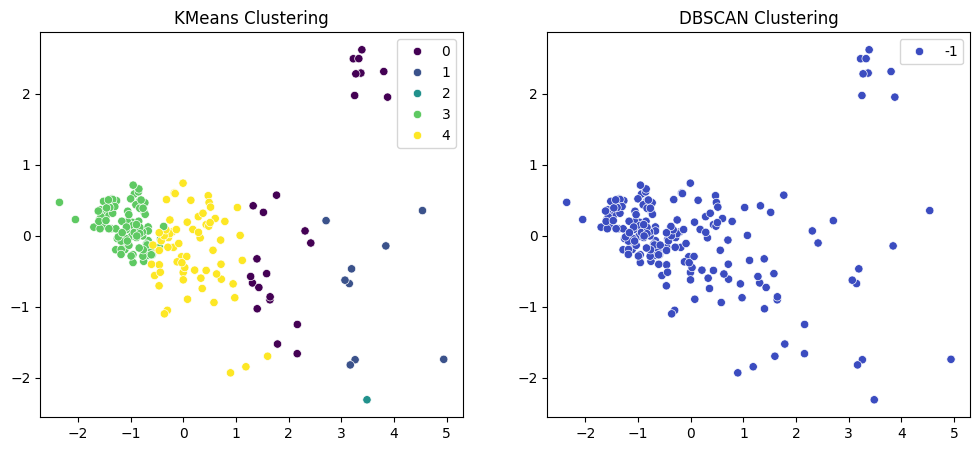

{'kmeans_labels': array([3, 3, 3, 0, 3, 3, 4, 3, 4, 4, 2, 3, 3, 4, 0, 4, 3, 3, 4, 4, 0, 0,
        4, 4, 4, 0, 3, 4, 4, 4, 3, 4, 0, 4, 3, 0, 3, 3, 4, 0, 4, 3, 3, 3,
        3, 4, 3, 3, 3, 0, 4, 3, 3, 4, 3, 3, 4, 0, 3, 3, 3, 3, 3, 3, 0, 3,
        4, 3, 3, 3, 4, 3, 3, 4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 3,
        4, 4, 3, 3, 3, 4, 3, 4, 4, 1, 3, 4, 0, 3, 3, 3, 1, 4, 3, 3, 4, 3,
        3, 0, 3, 1, 4, 4, 4, 4, 3, 4, 3, 4, 0, 3, 4, 4, 4, 0, 4, 1, 3, 0,
        0, 4, 0, 3, 4, 4, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 0, 3, 3,
        0, 3, 4, 1, 4, 3, 4, 4, 4, 1, 3, 4, 1, 3, 3, 3, 3, 1, 4, 4, 0, 4,
        0, 4, 3, 3, 3, 3, 4, 0, 0, 3, 4, 3, 3, 3, 4, 3, 4, 4, 3, 4, 3, 3,
        0, 3], dtype=int32),
 'dbscan_labels': array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1,

In [53]:
cluster_embeddings(elmo_embeddings)

Random Forest Accuracy: 0.8000, AUC: 0.7812
Gradient Boosting Accuracy: 0.8000, AUC: 0.7891
Logistic Regression Accuracy: 0.8250, AUC: 0.8594
kNN Accuracy: 0.8000, AUC: 0.8125
Decision Tree Accuracy: 0.6500, AUC: 0.4805


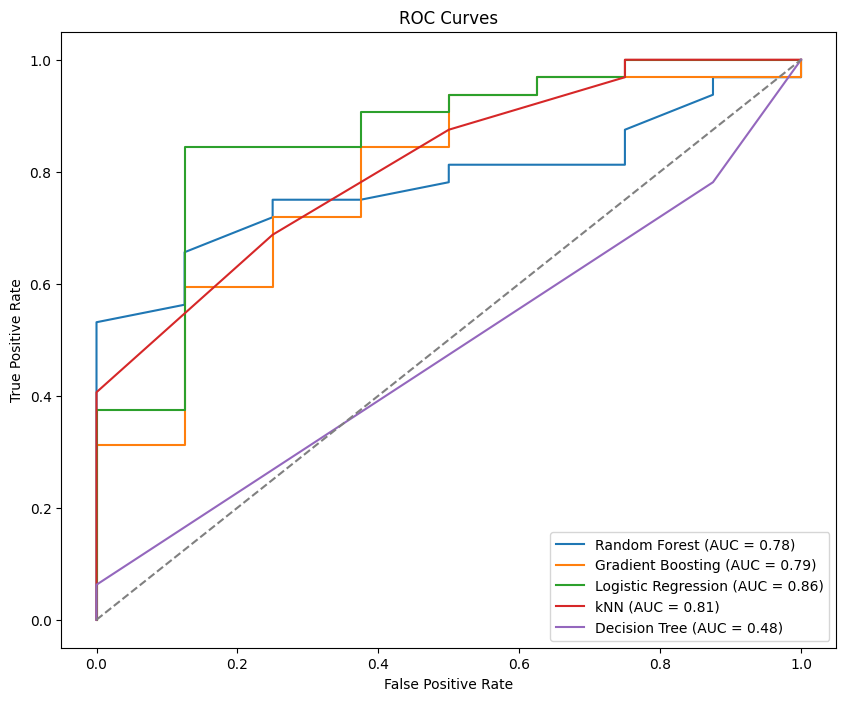

(0.8, 0.78125, 0.8, 0.7890625, 0.825, 0.859375, 0.8, 0.8125, 0.65, 0.48046875)

In [75]:
classification_model(elmo_embeddings, data['label'][:200])

# 3. Classify:

In [35]:
data

,comment,label,cleaned_comment,comment_length,cleaned_comment_string,Cluster
0,dalits are lowlives,N,"[dalit, lowliv]",2,dalit lowliv,0
1,gay people are a burden to our society,N,"[gay, peopl, burden, societi]",4,gay peopl burden societi,0
2,Arabs are not welcome,N,"[arab, welcom]",2,arab welcom,0
3,I'm not saying we should actually eliminate he...,N,"[im, say, actual, elimin, heeb, wish, natur, b...",9,im say actual elimin heeb wish natur becam ext...,0
4,bananas are for black people,N,"[banana, black, peopl]",3,banana black peopl,0
...,...,...,...,...,...,...
41139,Indian culture is so backwards,N,"[indian, cultur, backward]",3,indian cultur backward,0
41140,"Women don't want equality, they just want to b...",N,"[women, dont, want, equal, want, charg]",6,women dont want equal want charg,0
41141,fuck covid,P,"[fuck, covid]",2,fuck covid,0
41142,This computer is garbage,P,"[comput, garbag]",2,comput garbag,0


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Load your labels (ensure y is a 1D array)
X = elmo_embeddings  # Features
y = data['label'][:200]  # Target labels (should be 1D)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RF
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate model
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_accuracy:.4f}")


## Gradient boosting

# Train the model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Predictions
y_pred = gbm.predict(X_test)

# Evaluate
gb_accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))


## LogREg

# Train the model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluate
log_reg_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))



# Train the model (k=5 neighbors)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate
print("kNN Accuracy:", accuracy_score(y_test, y_pred))

## Decision Tree
# Train the model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.8000
Gradient Boosting Accuracy: 0.8
Logistic Regression Accuracy: 0.825
kNN Accuracy: 0.8
Decision Tree Accuracy: 0.65


In [57]:
# X: embeddings
# y = results
def classification_model(X, y): 

    # # Load your labels (ensure y is a 1D array)
    # X = X  # Features
    # y = y  # Target labels (should be 1D)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # RF
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Evaluate model
    rf_accuracy = accuracy_score(y_test, y_pred)
    print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


    ## Gradient boosting

    # Train the model
    gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm.fit(X_train, y_train)

    # Predictions
    y_pred = gbm.predict(X_test)

    # Evaluate
    gb_accuracy = accuracy_score(y_test, y_pred)
    print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))


    ## LogREg

    # Train the model
    logreg = LogisticRegression(max_iter=1000, random_state=42)
    logreg.fit(X_train, y_train)

    # Predictions
    y_pred = logreg.predict(X_test)

    # Evaluate
    log_reg_accuracy = accuracy_score(y_test, y_pred)
    print("Logistic Regression Accuracy:", log_reg_accuracy)


    # Train the model (k=5 neighbors)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    # Predictions
    y_pred = knn.predict(X_test)

    # Evaluate
    knn_acc = accuracy_score(y_test, y_pred)
    print("kNN Accuracy:", knn_acc)

    ## Decision Tree
    # Train the model
    dt = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt.fit(X_train, y_train)

    # Predictions
    y_pred = dt.predict(X_test)

    # Evaluate
    dt_acc = accuracy_score(y_test, y_pred)
    print("Decision Tree Accuracy:", dt_acc)

    return rf_accuracy, gb_accuracy, log_reg_accuracy, knn_acc, dt_acc

In [73]:
data['label'].apply(convert_labels)

0        1
1        1
2        1
3        1
4        1
        ..
41139    1
41140    1
41141    0
41142    0
41143    1
Name: label, Length: 41144, dtype: int64

In [74]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def convert_labels(label):
    if label == 'N':
        return 1
    else :
        return 0
    

def classification_model(X, y): 
    # Split into training and testing sets
    y = y.apply(convert_labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    plt.figure(figsize=(10, 8))

    # ----------------- Random Forest -----------------
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    y_proba = rf.predict_proba(X_test)[:, 1]  # Probability for class 1

    rf_accuracy = accuracy_score(y_test, y_pred)
    rf_auc = roc_auc_score(y_test, y_proba)
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")

    print(f"Random Forest Accuracy: {rf_accuracy:.4f}, AUC: {rf_auc:.4f}")


    # ----------------- Gradient Boosting -----------------
    gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm.fit(X_train, y_train)
    y_pred = gbm.predict(X_test)
    y_proba = gbm.predict_proba(X_test)[:, 1]

    gb_accuracy = accuracy_score(y_test, y_pred)
    gb_auc = roc_auc_score(y_test, y_proba)
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {gb_auc:.2f})")

    print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}, AUC: {gb_auc:.4f}")


    # ----------------- Logistic Regression -----------------
    logreg = LogisticRegression(max_iter=1000, random_state=42)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_proba = logreg.predict_proba(X_test)[:, 1]

    log_reg_accuracy = accuracy_score(y_test, y_pred)
    log_reg_auc = roc_auc_score(y_test, y_proba)
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {log_reg_auc:.2f})")

    print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}, AUC: {log_reg_auc:.4f}")


    # ----------------- kNN -----------------
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_proba = knn.predict_proba(X_test)[:, 1]

    knn_acc = accuracy_score(y_test, y_pred)
    knn_auc = roc_auc_score(y_test, y_proba)
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"kNN (AUC = {knn_auc:.2f})")

    print(f"kNN Accuracy: {knn_acc:.4f}, AUC: {knn_auc:.4f}")


    # ----------------- Decision Tree -----------------
    dt = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    y_proba = dt.predict_proba(X_test)[:, 1]

    dt_acc = accuracy_score(y_test, y_pred)
    dt_auc = roc_auc_score(y_test, y_proba)
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {dt_auc:.2f})")

    print(f"Decision Tree Accuracy: {dt_acc:.4f}, AUC: {dt_auc:.4f}")


    # ----------------- Plot ROC Curves -----------------
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
    plt.title("ROC Curves")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

    return (rf_accuracy, rf_auc, 
            gb_accuracy, gb_auc, 
            log_reg_accuracy, log_reg_auc,
            knn_acc, knn_auc,
            dt_acc, dt_auc)


# Classify New Text

In [ ]:
new_data = pd.read_excel('/Users/gracefujinaga/Documents/Northwestern/MSDS_453/MSDS_453/data/new_hate_df.xlsx')
new_data